In [3]:
# =============================================================================
# =============================================================================
# # 문제 02 유형(DataSet_02.csv 이용)
# 구분자 : comma(“,”), 200 Rows, 6 Columns, UTF-8 인코딩

# 환자의 상태와 그에 따라 처방된 약에 대한 정보를 분석하고자한다
# 
# 컬 럼 / 정 의  / Type
# Age  / 연령 / Integer
# Sex / 성별 / String
# BP / 혈압 레벨 / String
# Cholesterol / 콜레스테롤 레벨 /  String
# Na_to_k / 혈액 내 칼륨에 대비한 나트륨 비율 / Double
# Drug / Drug Type / String
# =============================================================================
# =============================================================================

import pandas as pd

data2 = pd.read_csv('./DataSet/DataSet_02.csv')
data2.columns
# ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [14]:
# =============================================================================
# 1.해당 데이터에 대한 EDA를 수행하고, 여성으로 혈압이 High, Cholesterol이 Normal인
# 환자의 전체에 대비한 비율이 얼마인지 소수점 네 번째 자리에서 반올림하여 소수점 셋째
# 자리까지 기술하시오. (답안 예시) 0.123
# =============================================================================

q1 = data2[['Sex','BP','Cholesterol']].value_counts(normalize=True)
result = q1[('F','HIGH','NORMAL')]

print(f'답: {result}')
# 답: 0.105

답: 0.105


In [26]:
# =============================================================================
# 2. Age, Sex, BP, Cholesterol 및 Na_to_k 값이 Drug 타입에 영향을 미치는지 확인하기
# 위하여 아래와 같이 데이터를 변환하고 분석을 수행하시오.
# - Age_gr 컬럼을 만들고, Age가 20 미만은 ‘10’, 20부터 30 미만은 ‘20’, 30부터 40 미만은
# ‘30’, 40부터 50 미만은 ‘40’, 50부터 60 미만은 ‘50’, 60이상은 ‘60’으로 변환하시오.
# - Na_K_gr 컬럼을 만들고 Na_to_k 값이 10이하는 ‘Lv1’, 20이하는 ‘Lv2’, 30이하는 ‘Lv3’, 30
# 초과는 ‘Lv4’로 변환하시오.
# - Sex, BP, Cholesterol, Age_gr, Na_K_gr이 Drug 변수와 영향이 있는지 독립성 검정을
# 수행하시오.
# - 검정 수행 결과, Drug 타입과 연관성이 있는 변수는 몇 개인가? 연관성이 있는 변수
# 가운데 가장 큰 p-value를 찾아 소수점 여섯 번째 자리 이하는 버리고 소수점 다섯
# 번째 자리까지 기술하시오.
# (답안 예시) 3, 1.23456
# =============================================================================
import numpy as np

q2_2 = data2.copy()

# 1. Age_gr 컬럼
q2_2['Age_gr'] = np.where(q2_2['Age'] < 20, 10,
                    np.where(q2_2['Age'] < 30, 20,
                        np.where(q2_2['Age'] < 40, 30,
                            np.where(q2_2['Age'] < 50, 40,
                                np.where(q2_2['Age'] < 60, 50, 60)))))

# 2. Na_K_gr 컬럼
q2_2['Na_K_gr'] = np.where(q2_2['Na_to_K'] < 10, 'Lv1',
                    np.where(q2_2['Na_to_K'] < 20, 'Lv2',
                        np.where(q2_2['Na_to_K'] < 30, 'Lv3', 'Lv4')))

# 3. Sex, BP, Cholesterol, Age_gr, Na_K_gr이 Drug 변수와 영향이 있는지 독립성 검정
# (= 카이스퀘어 검정)
from scipy.stats import chi2_contingency

var_list = ['Sex', 'BP', 'Cholesterol', 'Age_gr', 'Na_K_gr']

# 반복문으로 구성
q2_2_out = []
for i in var_list:
    # 빈도 생성
    tab = pd.crosstab(index=q2_2[i], columns=q2_2['Drug'])
    # 카이스퀘어 검정
    chi_test = chi2_contingency(tab)
    # p-value만
    pvalue = chi_test[1]
    # 리스트 추가
    q2_2_out.append([i, pvalue])

# Drug 타입과 연관성이 있는 변수는 몇 개
q2_2_out = pd.DataFrame(q2_2_out, columns=['var','pvalue'])
q2_2_out2 = q2_2_out[q2_2_out.pvalue < 0.05]
len(q2_2_out2)  # 4

# 가운데 가장 큰 p-value
q2_2_out2.pvalue.max()  # 0.0007010113024729462

# 답 : 4, 0.00070

4

### 카이제곱 독립검정

카이제곱검정 : 어떤 범주형 확률변수 X가 다른 범주형 확류변수 Y와 독립인지 상관관계를 가지는지 검정
- 카이제곱검정을 독립을 확인하는 데 사용하면 카이제곱 독립검정

- scipy의 `sci2_contingency()`
- X의 값에 따른 각각의 Y분포가 2차원 표(contingency table)의 형태로 주어지고
- 독립인 경우의 분포와 실제 y표본분포이 차이를 검정통계량으로 계산
- 이 값이 충분히 크면 X와 Y느 상관관계가 있다.
- 첫번째 값이 검정통계량, 두번째 값이 유의확률

|--- Na_to_K <= 14.829
|   |--- BP_cd <= 1.500
|   |   |--- BP_cd <= 0.500
|   |   |   |--- Ch_cd <= 0.500
|   |   |   |   |--- class: drugX
|   |   |   |--- Ch_cd >  0.500
|   |   |   |   |--- class: drugC
|   |   |--- BP_cd >  0.500
|   |   |   |--- class: drugX
|   |--- BP_cd >  1.500
|   |   |--- Age <= 50.500
|   |   |   |--- class: drugA
|   |   |--- Age >  50.500
|   |   |   |--- class: drugB
|--- Na_to_K >  14.829
|   |--- class: DrugY



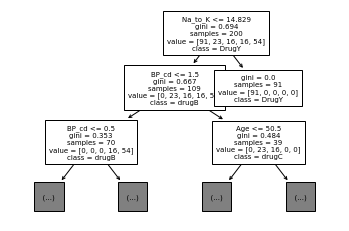

In [38]:
# =============================================================================
# 3.Sex, BP, Cholesterol 등 세 개의 변수를 다음과 같이 변환하고 의사결정나무를 이용한
# 분석을 수행하시오.
# - Sex는 M을 0, F를 1로 변환하여 Sex_cd 변수 생성
# - BP는 LOW는 0, NORMAL은 1 그리고 HIGH는 2로 변환하여 BP_cd 변수 생성
# - Cholesterol은 NORMAL은 0, HIGH는 1로 변환하여 Ch_cd 생성
# - Age, Na_to_k, Sex_cd, BP_cd, Ch_cd를 Feature로, Drug을 Label로 하여 의사결정나무를
# 수행하고 Root Node의 split feature와 split value를 기술하시오.
# 이 때 split value는 소수점 셋째 자리까지 반올림하여 기술하시오. (답안 예시) Age,
# 12.345
# =============================================================================

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

q3 = data2.copy()

q3['Sex_cd'] = np.where(q3['Sex'] == 'M', 0, 1)

q3['BP_cd'] = np.where(q3['BP'] == 'LOW', 0,
                np.where(q3['BP'] == 'NORMAL', 1, 2))

q3['Ch_cd'] = np.where(q3['Cholesterol'] == 'NORMAL', 0, 1)

# Feature
var_list = ['Age', 'Na_to_K', 'Sex_cd', 'BP_cd', 'Ch_cd']

# 의사결정나무
dt = DecisionTreeClassifier().fit(q3[var_list], q3['Drug'])

dt_plot = plot_tree(dt, feature_names=var_list, 
                  class_names = q3['Drug'].unique(),
                  max_depth=2,
                  fontsize = 7)

print(export_text(dt, feature_names=var_list, decimals=3))

#  Root Node의 split feature와 split value
# 답 : Na_to_K, 14.829

Recursive feature elimination (rfe)
- 전체 feature에 대해 훈련 후 중요하지 않은 feature 들을 제거하면서 원하는 개수의 feature 수만 남기도록 하는 방법

1. 클래스 선언
2. fit
3. transform

Parameter
- estimator : feature importance가 계산 가능한 모델
- n_features_to_select : 남겨질 중요한 feature의 수를 선언하며 지정되지 않을 경우 원래 feature의 절반이 선택
- step : 매 스텝마다 제거될 feature 수 의미
    
Attributes
- estimator_ : 선택된 feature들로만 훈련된 estimator
- n_features_ : 선택된 feature의 개수
- ranking_ : 각 feature의 순위이며 선택된 feature는 1이 됨
- support_ : 선택된 feature를 가리키는 마스크를 리턴